# Research assignment 3

[your name] *Luis Rubén González Márquez

[working title of the project] Violence and the timing of social conflict in Latin America under neoliberalism

[date] 03/03/2020

## 1. Build your hypothesis

Write bullet points that answer the following questions:

    A. What is your depedent variable? For this assignment, your depedent should be a continuous variable. Describe how your depedent variable is measured. If your data doesn't allow this, you can use either the General Social Survey 2018 or the Grant and Loan Repayment data. 
    Note: I obtained a dataset (Social Conflicts Analysis Database, SCAD, of UTA) about social conflicts in Latin America (I would like to follow their organization of information to build the one I would use in my research, and therefore do similar statistical procedures).  
    **My dependent variable is the time length of social conflicts in Latin America between 1990-2017. It is measured in days.. 
        
    B. What are the indepedent variables you are most interested in? Are they interval ratio or nominal? Why?
    I am intersted in two variables: repression, which is a nominal variable, and the escalation in protest, which is the transformation in the kind of conflict into another. 

    C. What are your control variables? Are they interval ratio or nominal? Why? My control variable is the significance of women participation in the event (a nominal variable). 

    D. What are your hyphotheses on the relationships between your dependent and independent variables (including control variables)? Make seperate hypotheses for separate independent variables and for intervening relationships that involve multiple independent variables of interest.
          
    If state repression levels are high in Latin America under the neoliberal context, then the time lenght of the conflict tend to be longer
            
    If state repression levels is high and there is an escalation of conflict (interveining) in Latin America under the neoliberal context, then the time length of conflict tends to be longer.
    
    If the escalation of social conflicts and state repression levels are high in Latin America under the neoliberal context, then the time length of the conflict tend to be longer, controlling for the significance of female participation
     

## 2. Prepare your data

Do the following:

    A. Set current directory

    B. Set more off

    C. Creat log file
    
    D. Load only variable from the dataset that you will use

    E. Use -describe- and -codebook- to see details of the varaibles

In [20]:
set more off
*log using researchassig3Rub.smcl
insheet using SCAD2018LatinAmerica_Final.csv, clear
ds, varwidth (32)



(44 vars, 5,602 obs)

eventid             startdate           stmo                eyr                 actor2              cgovtarget          repress             locnum              issue3              female_event        latitude
id                  enddate             styr                etype               actor3              rgovtarget          elocal              gislocnum           issuenote           lgbtq_issue         longitude
ccode               duration            eday                escalation          target1             npart               ilocal              issue1              nsource             coder               geo_comments
countryname         stday               emo                 actor1              target2             ndeath              sublocal            issue2              notes               acd_questionable    location_precision


In [25]:
keep female_event escalation duration repress
label define escalat 0 "No esc" 1 "Org demon" 2 "Spont demon" 3 "Org viol riot" 4 "Spont viol riot" 5 "Gral str" 6 "Ltd str" 7 "Pro-gov viol" 8 "Anti-gov viol" 9 "Extra-gov viol" 10 "Intra-gov viol"
label values escalat escalation
label define female 1 "Yes" 0 "No"
label values female female_event

In [28]:
label define rep 0 "No repress" 1 "Non-lethal repress" 2 "Lethal repress"
labe values rep repress

In [29]:
codebook female_ escalation duration repress
describe female_ escalation duration repress
tab female_event
tab escalation 
tab repress



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
female_event                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (byte)
                 label:  female_event

                 range:  [0,1]                        units:  1
         unique values:  2                        missing .:  0/5,602

            tab

## 3. Use scatterplots to visually assess relationships between your dependent variable and all of your independent variables

    A. Quietly generate scatterplots for the dependent variable and each independent variable (including contol variables). Then use graph combine to examine all of the scatter plots.

    B. Write a paragraph interpreting what the scatterplots show
    **The scatterplots express that most of the conflicts in Latin America under a neoliberal context that lasted more than one day tended in a overwhelming majority to be develop in short periods of time (less than 100 days). The relation to levels of repression shows that low disposition to repression levels is difficult to asses from the scatterplot, since the three levels seem to have similar amounts (with some more in the no repression category) and lenght (with relevant outliers of conflicts of more than a year in the three cases). In the case of escalation (the transformation of the conflict into one of a different nature), most of the conflicts did not presented this process, with the important exception of those that turned into spontaneous violent riots; in both cases, conflicts tended to be longer in no escalation or in escalation to violent riots cases than the other categories. Finally, events with significant participation of women were shorter and less frequent than the ones that did not. 

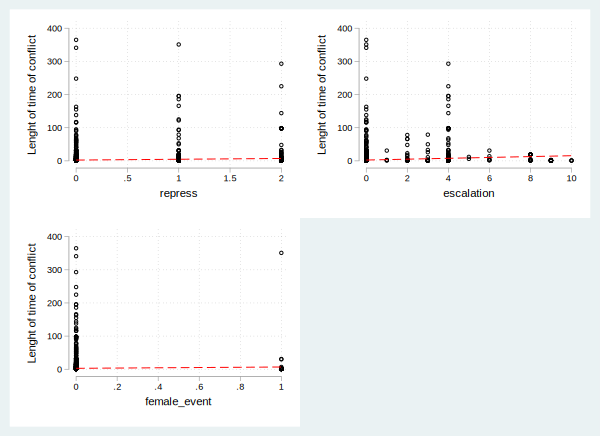

In [30]:
foreach x of var repress escalation female_event {
 quietly graph twoway (scatter duration `x') (lfit duration `x', color(red)), name(`x', replace) legend(off) ytitle(Lenght of time of conflict) scheme(plotplainblind)
}
graph combine repress escalation female_event

## 4. Assess multicorrelation among your independent variables

    A. Create a correlation matrix for all of your variables.

    B. . Write bullet points or a short paragraph summarizing what the matrix shows.
    -Among all the independent variables considered in correlation to the time length of protest event (duration), repression and duration presented statistical significance
    -However, female participation and time lenght of mobilization correlation does not present statistical significance
    -Escalation and repression are significantly correlated, which indicates an association between a changing nature of a conflict with at least some levels of state violence. 
    -The correlation of repression and the significance of female participation and escalation is low. Since escalation is a categorical variable is difficult to interpret is negative nature; in the case of repression, this could indicate an association of lower levels of repression in mobilization having women as protagonists (a relationship that needs to be further explored). 
    

In [31]:
pwcorr duration repress escalation female_event, sig


             | duration  repress escala~n female~t
-------------+------------------------------------
    duration |   1.0000 
             |
             |
     repress |   0.0931   1.0000 
             |   0.0000
             |
  escalation |   0.1169   0.2790   1.0000 
             |   0.0000   0.0000
             |
female_event |   0.0310  -0.0017  -0.0223   1.0000 
             |   0.0201   0.8965   0.0944
             |


## 5. Describe at least 2 OLS models to test your hypotheses

Write a paragraph or a set of bullet points that explain:

    A. Which model tests which of your hypotheses
    
    The first model will test the first hypothesis, about the significance of repression on the time lenght of social conflicts in Latin America under a neoliberal context. 
    
    The second model will test the third hypothesis: the effect of repression mediated by escalation on the duration of conflict in Latin America under a neoliberal context.
    
    The third model will test the forth hypothesis: the effect of repression mediated by escalation on the duration of conflict in Latin America in a neoliberal context, controlling for the effect of significant participation of women.
    
    B. Which variables are included in each model: 
    
    -Model 1: independent variable (repression), dependent variable (duration)
    
    -Model 2: independent variables (repression and escalation), dependent variable (duration)
    
    -Model 3: independent variables (repression, escalation and female_event), dependent variable (duration)
    
    B. How/why adding particular variables to subsequent models will test for spurious or intervening relationships. 
    -The first model will contribute to see the bivariate relationship of repression and time length. Whereas the second model could help us understand the interveing relationship of escalation (the transformation of nature in protest) that follows repression and how both predict the time length of social conflict in Latin America under neoliberalism. Finally, the third model will test the same hypothesis, controling for the effect of centrality of women's participatin in the events. 

## 6. Write OLS regression equations for each model

Use subscripts to indicate which symbols represesent your different independent variables. To do so, you can copy and paste the LaTex code in this week's lesson notebook and edit the subscripts.



$\hat{duration} = \alpha + \beta_1  \cdot repress + \beta_k \cdot x_k $

$\hat{duration} = \alpha + \beta_1  \cdot repress + \beta_2  \cdot escalation + \beta_k \cdot x_k $

$\hat{duration} = \alpha + \beta_1  \cdot repress + \beta_2  \cdot escalation + \beta_3  \cdot femaleevent+ \beta_k \cdot x_k $


## 7. Estimate your models with stata

    A. Write Stata code to estimate the models and store the regression results
    
    B. Write code to output the estimates in a table within Jupyter Notebook in HTML (with %html magic) and as an RTF file

In [32]:
quietly eststo: reg duration repress
quietly eststo: reg duration repress escalation
quietly eststo: reg duration repress escalation female_event

In [35]:
%html
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (_cons "Constant" repress "Repression" escalation "Escalation" female_event "Significance of female participation") html

This front-end or document format cannot display HTML

In [36]:
esttab using "Table.rtf", stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (_cons "Constant" repress "Repression" escalation "Escalation" female_event "Significance of female participation") rtf

(output written to Table.rtf)


## 8. Summarize the results for your hypotheses

    A. Which of your hypotheses are supported and which are rejected by the (in)consistency of coefficients across all of your models?
    
    **All of the hypothesis can be accepted at the 99.999 percent confidence interval. In the case of the significance of female participation, the coefficient for  was supported at 95% confidence interval. The explanatory power of the second and third model, multivariate, is very similar among one to another (R squared), and both are greater than the bivariate model. 
    
    B. Which of your hypotheses regarding intervening or spurious relationships are supported / rejected by similarities / differences in coefficients across all of your models?
    
    **The coefficient of repression increase of 2.4 days for time lenght of mobilization is reduced to 1.7 days by adding escalation (in model 2). While adding did not affected repression and just increased in a very small amount escalation, the significance of female protest in the model is associated with an increase of 4.2 days in Model 3. 
    
    C. What ideas do you have for why any of your hypotheses were rejected? Are there additional omitted variables do you think you should include to test your hypotheses that might change your results? Why? 
    **Although all models were accepted, their statistical significance is not as high as previously expected. One strategy could be introduce to improve clarify the interviening effect of escalation on the second model: to reorganize the intervals so escalation could express a transformation from non-violent to greater violent transformation of conflicts. And another is the introduction of other controls besides the female participation: the type of mobilization and the number of deaths. 